# Configuração

In [ ]:
!pip uninstall numpy
!pip install numpy

!pip install pmdarima

Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.3MB 1.6MB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have 

     |████████████████████████████████| 1.5MB 4.0MB/s 
     |████████████████████████████████| 9.5MB 37.9MB/s 
     |████████████████████████████████| 14.8MB 204kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Import modules
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
from random import shuffle, choice
import datetime

import matplotlib
import statsmodels.api as sma
import statsmodels.graphics as smg
import statsmodels.tsa as smt
import statsmodels.tools as smtools

from pmdarima.arima import auto_arima

In [ ]:
!git clone https://github.com/eitiyamamoto/MO826-projeto.git
%cd MO826-projeto
!ls
!git pull origin master

Cloning into 'MO826-projeto'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 172 (delta 57), reused 126 (delta 22), pack-reused 0
Receiving objects: 100% (172/172), 65.78 MiB | 9.47 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Checking out files: 100% (80/80), done.
/content/MO826-projeto/MO826-projeto
CONTRIBUTING.rst  image        mo826_projeto  reports		    tests
data		  LICENSE      notebooks      requirements_dev.txt  tox.ini
docs		  Makefile     README.md      setup.cfg
HISTORY.rst	  MANIFEST.in  README.rst     setup.py
From https://github.com/eitiyamamoto/MO826-projeto
 * branch            master     -> FETCH_HEAD
Already up to date.


In [ ]:
isolamento_sao_paulo_data = pd.read_csv('data/raw/20210420_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

In [ ]:
isolamento_sao_paulo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271966 entries, 0 to 271965
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   nome_munic     271966 non-null  object 
 1   codigo_ibge    271966 non-null  int64  
 2   dia            271966 non-null  int64  
 3   mes            271966 non-null  int64  
 4   datahora       271966 non-null  object 
 5   casos          271966 non-null  int64  
 6   casos_novos    271966 non-null  int64  
 7   casos_pc       271966 non-null  object 
 8   casos_mm7d     271966 non-null  object 
 9   obitos         271966 non-null  int64  
 10  obitos_novos   271966 non-null  int64  
 11  obitos_pc      271966 non-null  object 
 12  obitos_mm7d    271966 non-null  object 
 13  letalidade     271966 non-null  object 
 14  nome_ra        271545 non-null  object 
 15  cod_ra         271966 non-null  int64  
 16  nome_drs       271545 non-null  object 
 17  cod_drs        271966 non-nul

In [ ]:
isolamento_sao_paulo_data.head(10)

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0              Adamantina      3500105   25  ...   -21,682  -51,0737              9
1                  Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2                   Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3          Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4        Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9
5  Águas de Santa Bárbara      3500550   25  ...  -22,8812  -49,2421              9
6      Águas de São Pedro      3500600   25  ...  -22,5977  -47,8734              9
7                  Agudos      3500709   25  ...  -22,4694  -48,9863              9
8                Alambari      3500758   25  ...  -23,5503   -47,898              9
9       Alfredo Marcondes      3500808   25  ...  -21,9527   -51,414              9

[10 rows x 26 columns]

In [ ]:
booleans = isolamento_sao_paulo_data['codigo_ibge'] == 3509502
filter_campinas = pd.Series(booleans)
campinas_isolamento = isolamento_sao_paulo_data[filter_campinas]
campinas_isolamento.head(10)

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
108    Campinas      3509502   25  ...  -22,9053  -47,0659              9
753    Campinas      3509502   26  ...  -22,9053  -47,0659              9
1398   Campinas      3509502   27  ...  -22,9053  -47,0659              9
2043   Campinas      3509502   28  ...  -22,9053  -47,0659              9
2688   Campinas      3509502   29  ...  -22,9053  -47,0659              9
3333   Campinas      3509502    1  ...  -22,9053  -47,0659             10
3978   Campinas      3509502    2  ...  -22,9053  -47,0659             10
4623   Campinas      3509502    3  ...  -22,9053  -47,0659             10
5268   Campinas      3509502    4  ...  -22,9053  -47,0659             10
5913   Campinas      3509502    5  ...  -22,9053  -47,0659             10

[10 rows x 26 columns]

In [ ]:
cols_time_series = ['datahora', 'obitos_novos']
campinas_isolamento_obito = campinas_isolamento[cols_time_series]

In [ ]:
campinas_isolamento_obito['datahora'] = pd.to_datetime(campinas_isolamento_obito.loc[:, 'datahora'], format="%d/%m/%Y")
campinas_isolamento_obito['datahora'] = campinas_isolamento_obito.loc[:,'datahora'].astype('datetime64[ns]')
campinas_isolamento_obito = campinas_isolamento_obito.set_index("datahora")
campinas_isolamento_obito = campinas_isolamento_obito.sort_index().asfreq(freq='D', method='pad')
campinas_isolamento_obito.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='datahora', length=421, freq='D')

# Óbitos Novos

## Holt Winter

In [ ]:
campinas_isolamento_obito

obitos_novos
datahora                
2020-02-25             0
2020-02-26             0
2020-02-27             0
2020-02-28             0
2020-02-29             0
...                  ...
2021-04-16            15
2021-04-17            35
2021-04-18             5
2021-04-19             2
2021-04-20            19

[421 rows x 1 columns]

In [ ]:
case_train = campinas_isolamento_obito[:295]
case_test = campinas_isolamento_obito[295:]

In [ ]:
holt_winter_model = smt.holtwinters.ExponentialSmoothing(case_train, trend="add", seasonal="add")

result_confirmed = holt_winter_model.fit()

print(result_confirmed.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:             obitos_novos   No. Observations:                  295
Model:             ExponentialSmoothing   SSE                           3354.619
Optimized:                         True   AIC                            739.180
Trend:                         Additive   BIC                            779.737
Seasonal:                      Additive   AICC                           740.475
Seasonal Periods:                     7   Date:                 Sat, 19 Jun 2021
Box-Cox:                          False   Time:                         12:31:54
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.0769073                alpha                 True
smoothing_trend          

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


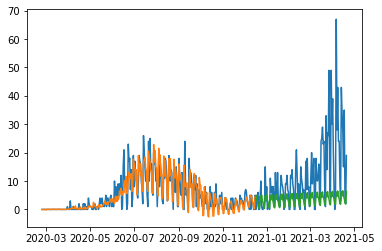

In [ ]:
pred_train = result_confirmed.predict(start=case_train.index[0], end=case_train.index[-1])
pred_test = result_confirmed.predict(start=case_test.index[0], end=case_test.index[-1])
plt.plot(campinas_isolamento_obito.index, campinas_isolamento_obito, label="Real cases")
plt.plot(pred_train.index, pred_train, label='Holt Winters Train')
plt.plot(pred_test.index, pred_test, label='Holt Winters Test')
plt.plot(figsize=(64,32))
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(case_test, pred_test)
mse

182.45517461921202

## Autor ARIMA

In [ ]:
model_auto = auto_arima(case_train['obitos_novos'].values,start_p=0, start_q=0, 
                            max_p=6, max_q=6, d=1,seasonal=True, trace=True,
                            error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=1865.061, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=1718.514, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=1718.507, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=1705.761, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=1677.285, Time=0.19 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=1679.283, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=1817.929, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=1718.947, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=1720.067, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=1718.714, Time=0.43 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=1679.283, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=1801.816, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=1716.131, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=1673.482, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=1701.592, Time=0.89 sec
 ARIMA(3,1

In [ ]:
model_auto.fit(case_train['obitos_novos'].values)

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 1),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [ ]:
predict = model_auto.predict(n_periods= int(case_test.size))

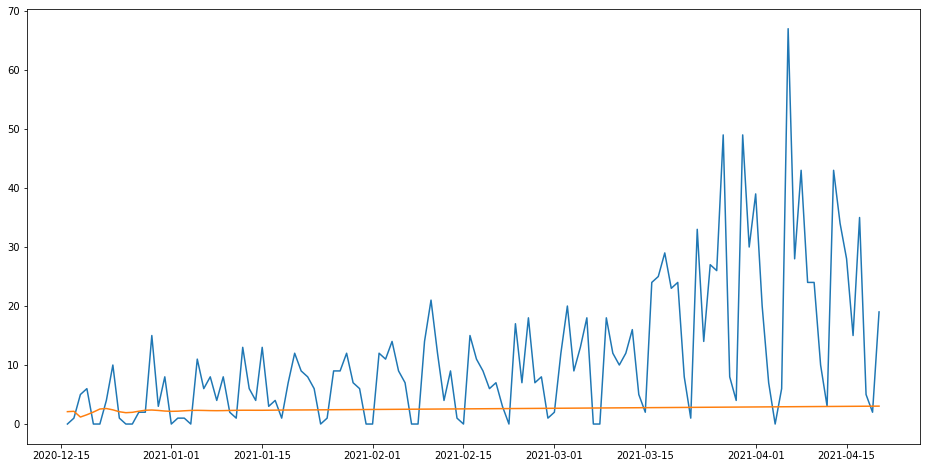

In [ ]:
plt.plot(case_test.index, case_test)
plt.plot(case_test.index, predict)
plt.gcf().set_size_inches((16,8))

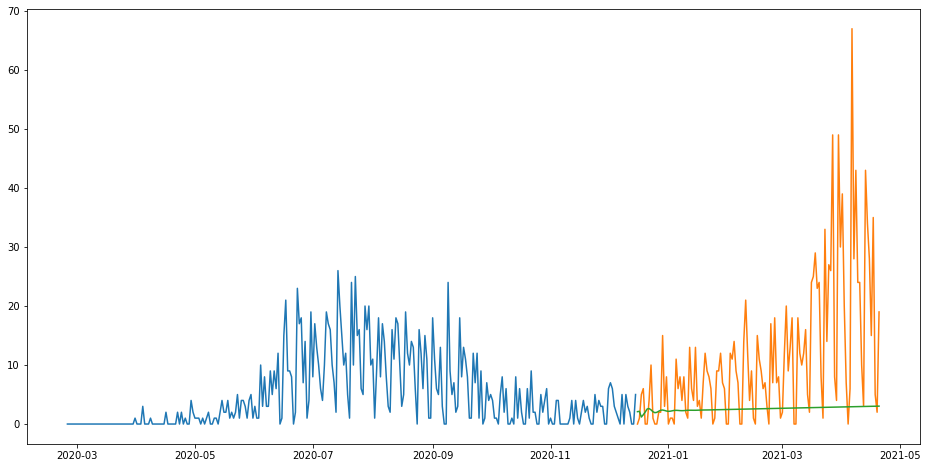

In [ ]:
plt.plot(case_train.index, case_train)
plt.plot(case_test.index, case_test)
plt.plot(case_test.index, predict)
plt.gcf().set_size_inches((16,8))

In [ ]:
mse = mean_squared_error(predict, case_test)
mse

219.0334336804482

## process data

In [ ]:
campinas_isolamento.head(5)

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
108    Campinas      3509502   25  ...  -22,9053  -47,0659              9
753    Campinas      3509502   26  ...  -22,9053  -47,0659              9
1398   Campinas      3509502   27  ...  -22,9053  -47,0659              9
2043   Campinas      3509502   28  ...  -22,9053  -47,0659              9
2688   Campinas      3509502   29  ...  -22,9053  -47,0659              9

[5 rows x 26 columns]

In [ ]:
campinas_isolamento['datahora'] = pd.to_datetime(campinas_isolamento.loc[:, 'datahora'], format="%d/%m/%Y")
campinas_isolamento['datahora'] = campinas_isolamento.loc[:,'datahora'].astype('datetime64[ns]')
campinas_isolamento = campinas_isolamento.set_index("datahora")
campinas_isolamento = campinas_isolamento.sort_index().asfreq(freq='D', method='pad')
campinas_isolamento.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20'],
              dtype='datetime64[ns]', name='datahora', length=421, freq='D')

In [ ]:
campinas_isolamento_lagged = campinas_isolamento_obito[:]
for i in range(1,7):
  campinas_obito_lagged = campinas_isolamento_obito.shift(i);
  campinas_obito_lagged = campinas_obito_lagged.rename(columns={'obitos_novos': 'date_' + str(i)})
  campinas_isolamento_lagged = pd.merge(campinas_isolamento_lagged, campinas_obito_lagged, how='inner', left_on=['datahora'], right_on=['datahora'])

In [ ]:
day = 24 * 60 * 60
week = 7 * day
year = 365.2425 * day
timestamp = campinas_isolamento_lagged.index.map(pd.Timestamp.timestamp)
campinas_isolamento_lagged['week_sin'] = np.sin(timestamp * (2 * np.pi / week))
campinas_isolamento_lagged['week_cos'] = np.cos(timestamp * (2 * np.pi / week))
campinas_isolamento_lagged['year_sin'] = np.sin(timestamp * (2 * np.pi / year))
campinas_isolamento_lagged['year_cos'] = np.cos(timestamp * (2 * np.pi / year))

In [ ]:
campinas_isolamento_lagged[50:].head(10)

obitos_novos  date_1  date_2  ...  week_cos  year_sin  year_cos
datahora                                  ...                              
2020-04-15             0     0.0     0.0  ...  0.623490  0.972898 -0.231233
2020-04-16             2     0.0     0.0  ...  1.000000  0.968777 -0.247935
2020-04-17             0     2.0     0.0  ...  0.623490  0.964368 -0.264563
2020-04-18             0     0.0     2.0  ... -0.222521  0.959675 -0.281113
2020-04-19             0     0.0     0.0  ... -0.900969  0.954697 -0.297579
2020-04-20             0     0.0     0.0  ... -0.900969  0.949437 -0.313958
2020-04-21             0     0.0     0.0  ... -0.222521  0.943896 -0.330244
2020-04-22             2     0.0     0.0  ...  0.623490  0.938075 -0.346432
2020-04-23             0     2.0     0.0  ...  1.000000  0.931977 -0.362517
2020-04-24             2     0.0     2.0  ...  0.623490  0.925603 -0.378495

[10 rows x 11 columns]

In [ ]:
obitos = campinas_isolamento_lagged.pop('obitos_novos')

In [ ]:
campinas_isolamento_lagged

date_1  date_2  date_3  ...  week_cos  year_sin  year_cos
datahora                            ...                              
2020-02-25     NaN     NaN     NaN  ... -0.222521  0.809912  0.586551
2020-02-26     0.0     NaN     NaN  ...  0.623490  0.819882  0.572532
2020-02-27     0.0     0.0     NaN  ...  1.000000  0.829610  0.558344
2020-02-28     0.0     0.0     0.0  ...  0.623490  0.839091  0.543991
2020-02-29     0.0     0.0     0.0  ... -0.222521  0.848325  0.529476
...            ...     ...     ...  ...       ...       ...       ...
2021-04-16    28.0    34.0    43.0  ...  0.623490  0.969803 -0.243891
2021-04-17    15.0    28.0    34.0  ... -0.222521  0.965464 -0.260537
2021-04-18    35.0    15.0    28.0  ... -0.900969  0.960839 -0.277107
2021-04-19     5.0    35.0    15.0  ... -0.900969  0.955930 -0.293594
2021-04-20     2.0     5.0    35.0  ... -0.222521  0.950738 -0.309994

[421 rows x 10 columns]

In [ ]:
campinas_isolamento_lagged = campinas_isolamento_lagged.fillna(0)
obitos = obitos.fillna(0)

In [ ]:
campinas_isolamento_lagged

date_1  date_2  date_3  ...  week_cos  year_sin  year_cos
datahora                            ...                              
2020-02-25     0.0     0.0     0.0  ... -0.222521  0.809912  0.586551
2020-02-26     0.0     0.0     0.0  ...  0.623490  0.819882  0.572532
2020-02-27     0.0     0.0     0.0  ...  1.000000  0.829610  0.558344
2020-02-28     0.0     0.0     0.0  ...  0.623490  0.839091  0.543991
2020-02-29     0.0     0.0     0.0  ... -0.222521  0.848325  0.529476
...            ...     ...     ...  ...       ...       ...       ...
2021-04-16    28.0    34.0    43.0  ...  0.623490  0.969803 -0.243891
2021-04-17    15.0    28.0    34.0  ... -0.222521  0.965464 -0.260537
2021-04-18    35.0    15.0    28.0  ... -0.900969  0.960839 -0.277107
2021-04-19     5.0    35.0    15.0  ... -0.900969  0.955930 -0.293594
2021-04-20     2.0     5.0    35.0  ... -0.222521  0.950738 -0.309994

[421 rows x 10 columns]

## SVR

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(),
                    svm.SVR(max_iter=5000, kernel='linear'))
clf.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='linear', max_iter=5000,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
r = clf.score(case_test, label_test)

In [ ]:
r

0.1670324615292763

In [ ]:
campinas_train_predict = clf.predict(case_train)

In [ ]:
campinas_test_predict = clf.predict(case_test)

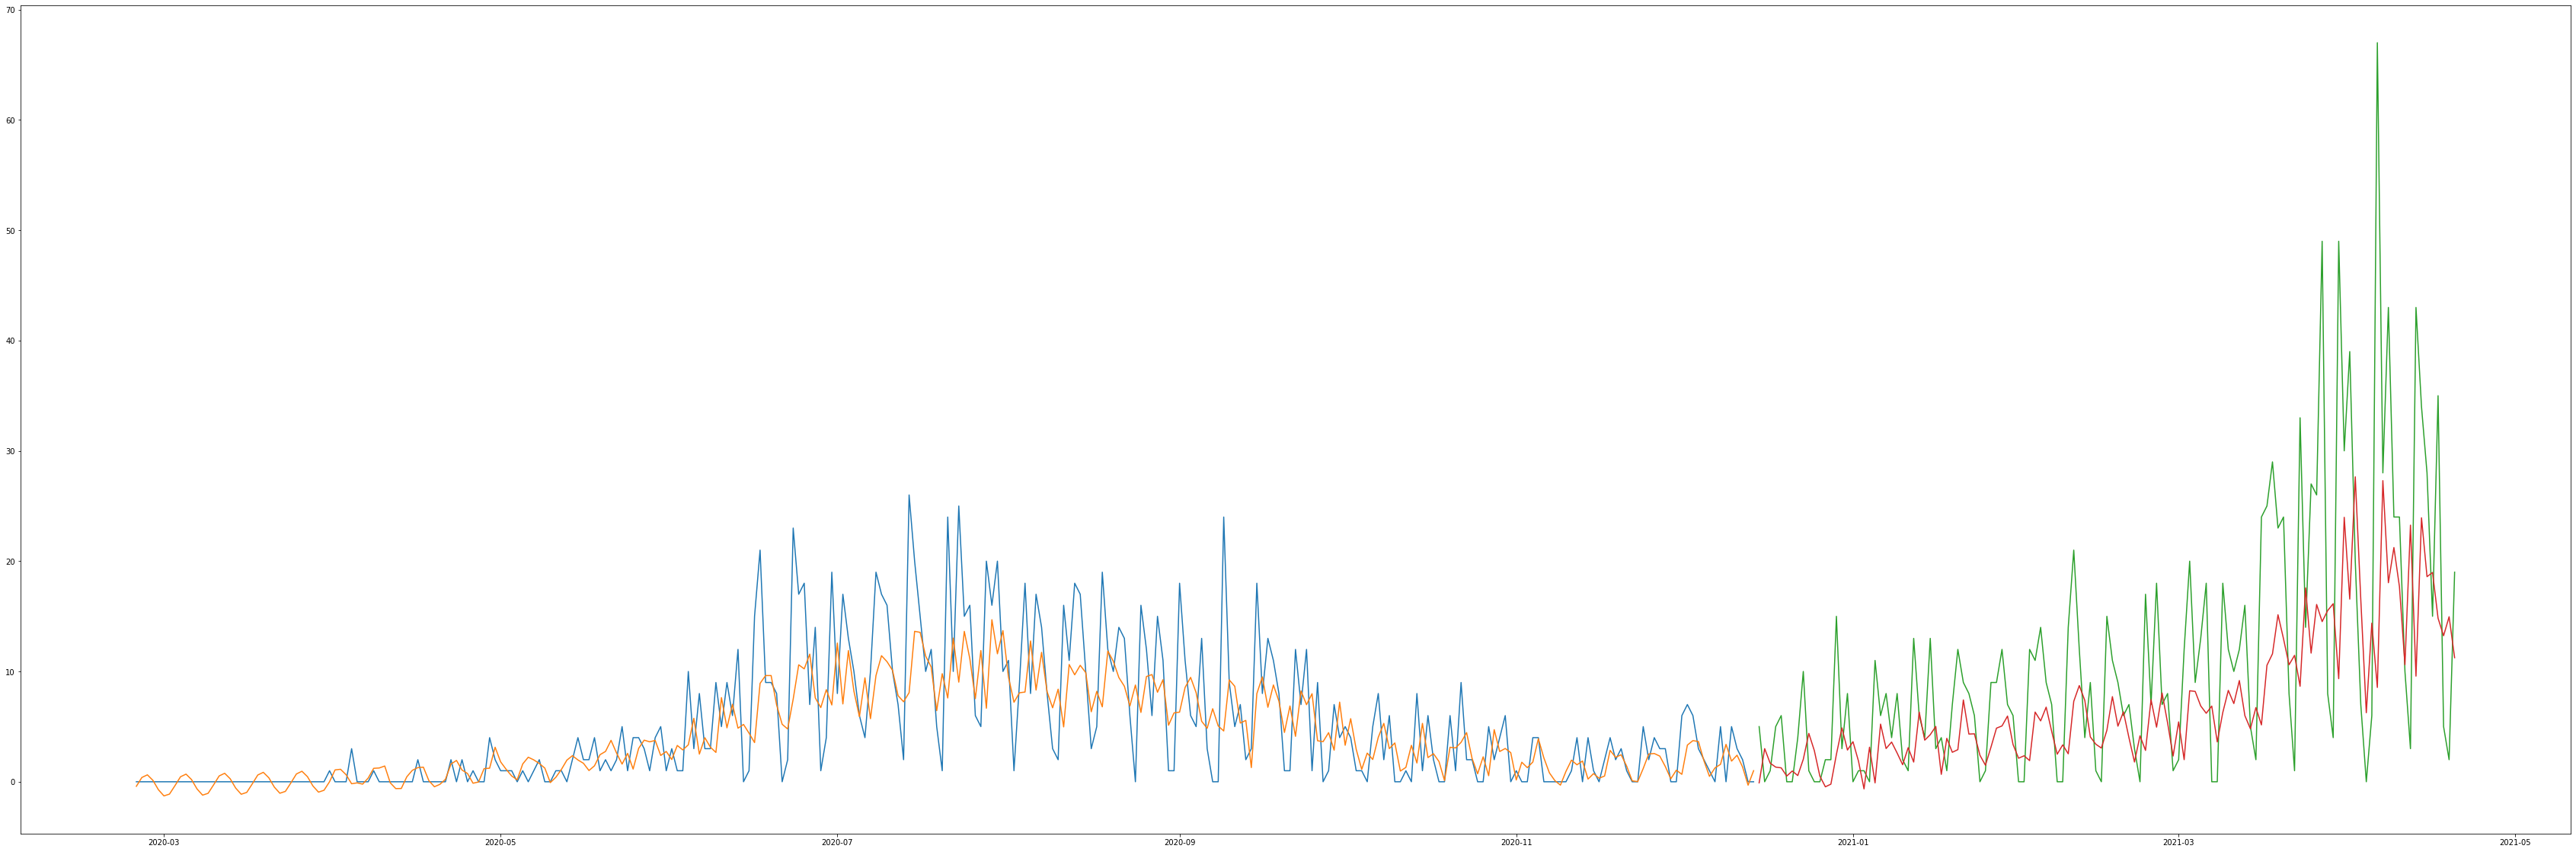

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

120.95314584973869

## SGD

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=1000, tol=1e-3))

In [ ]:
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

0.10952862891266091

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

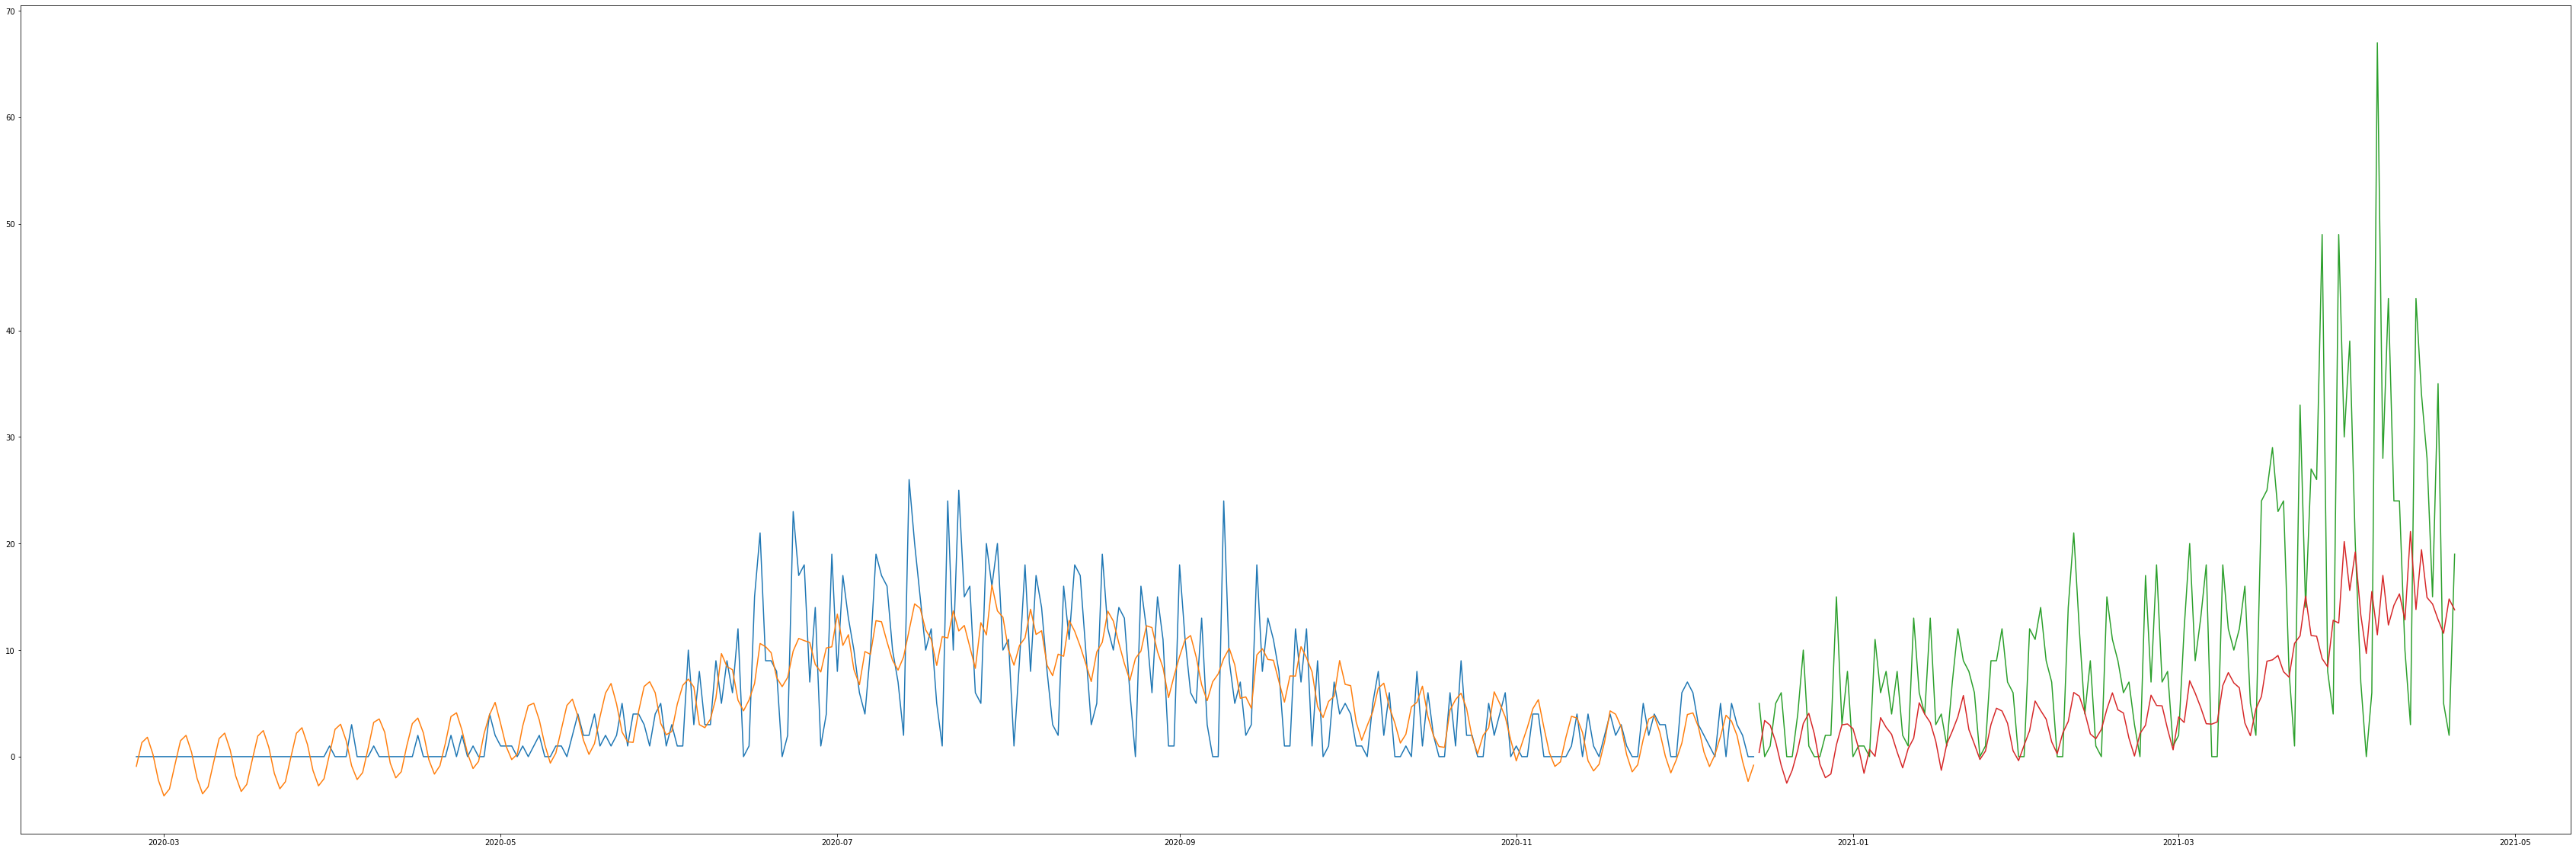

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

129.30313445333528

## Ada boost


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
reg = make_pipeline(StandardScaler(),
                    AdaBoostRegressor(random_state=0, n_estimators=200))
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostregressor',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                   loss='linear', n_estimators=200,
                                   random_state=0))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

0.03919213084454676

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

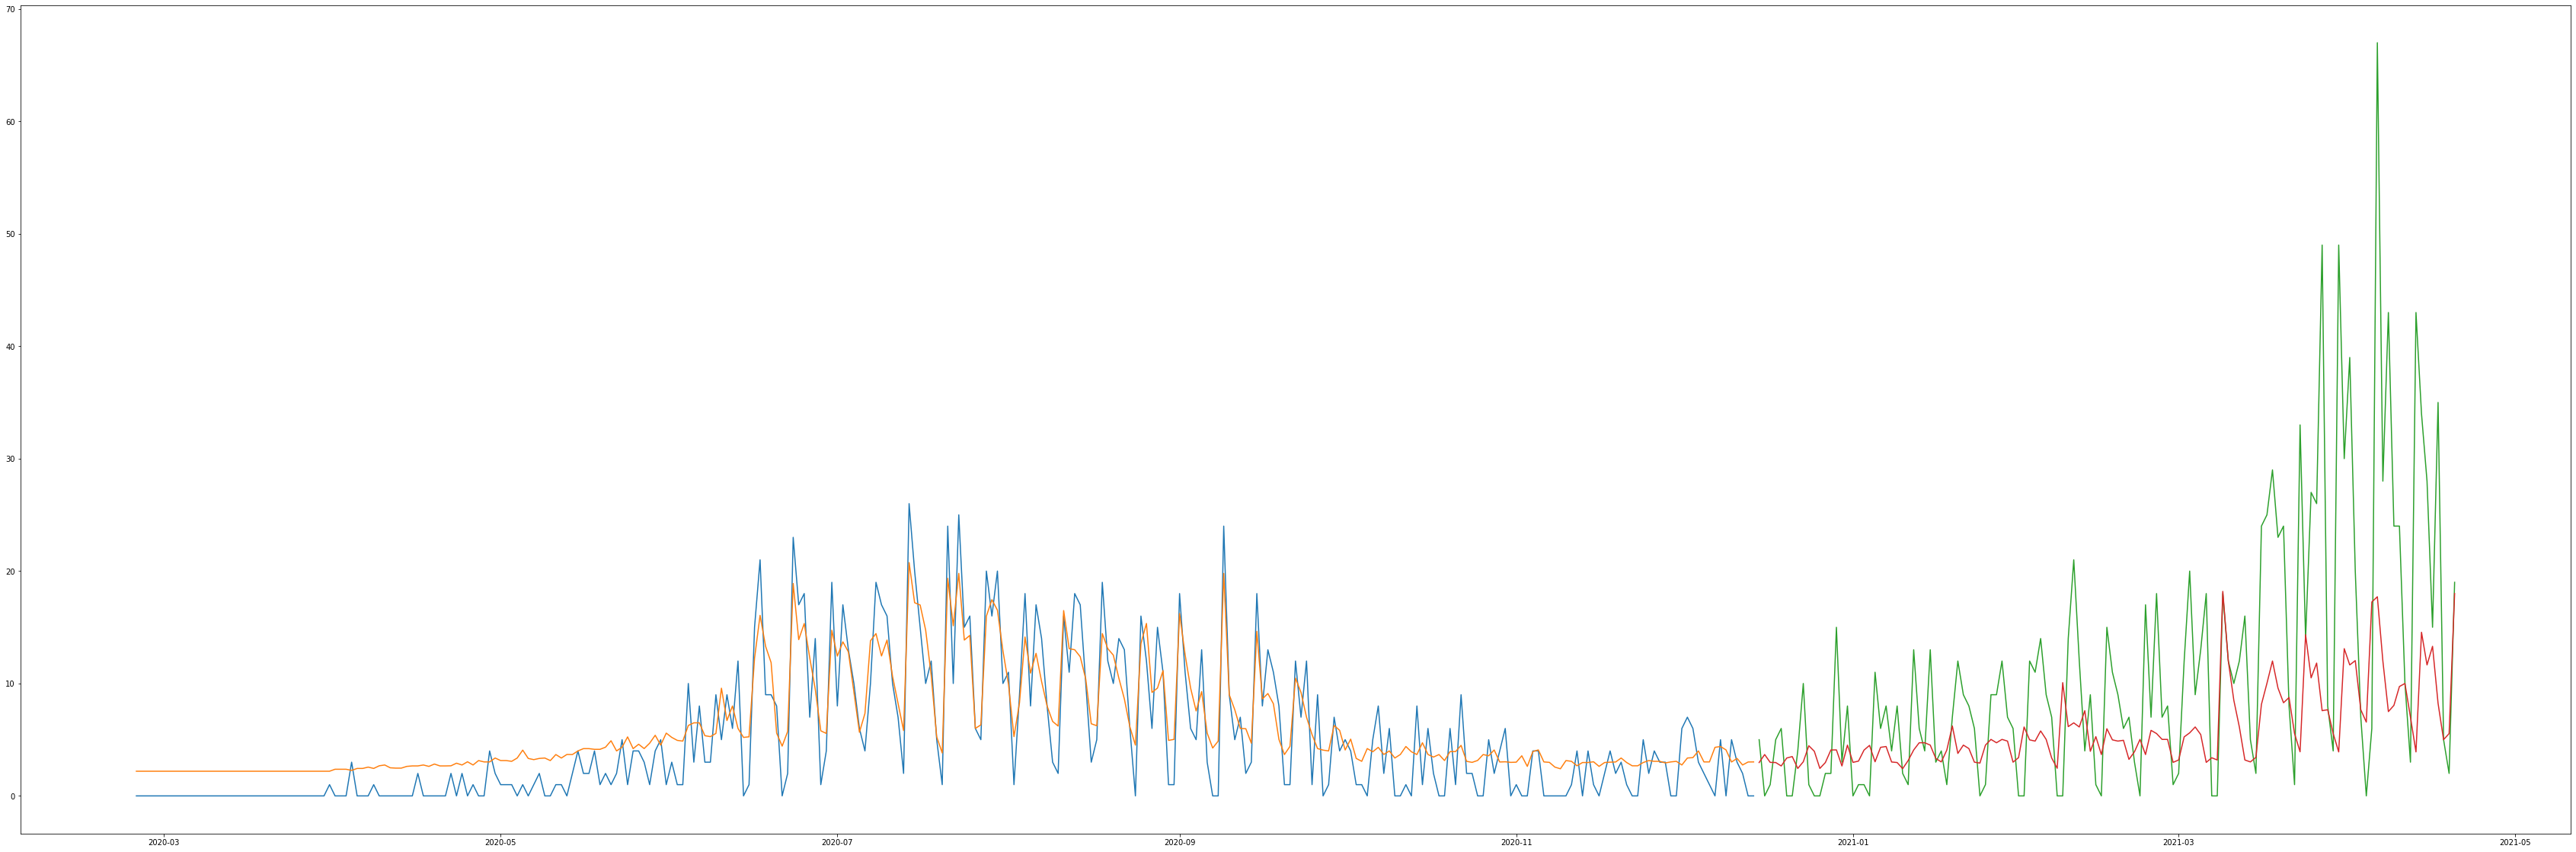

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

139.51652251046363

## NN

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
case_train = campinas_isolamento_lagged[:294]
label_train = obitos[:294]

case_test = campinas_isolamento_lagged[294:]
label_test = obitos[294:]

In [ ]:
reg = make_pipeline(StandardScaler(),
                    MLPRegressor(random_state=1, max_iter=200, hidden_layer_sizes=(50,25)))
reg.fit(case_train, label_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(50, 25),
                              learning_rate='constant',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=200, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='adam',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

0.39795103981838276

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

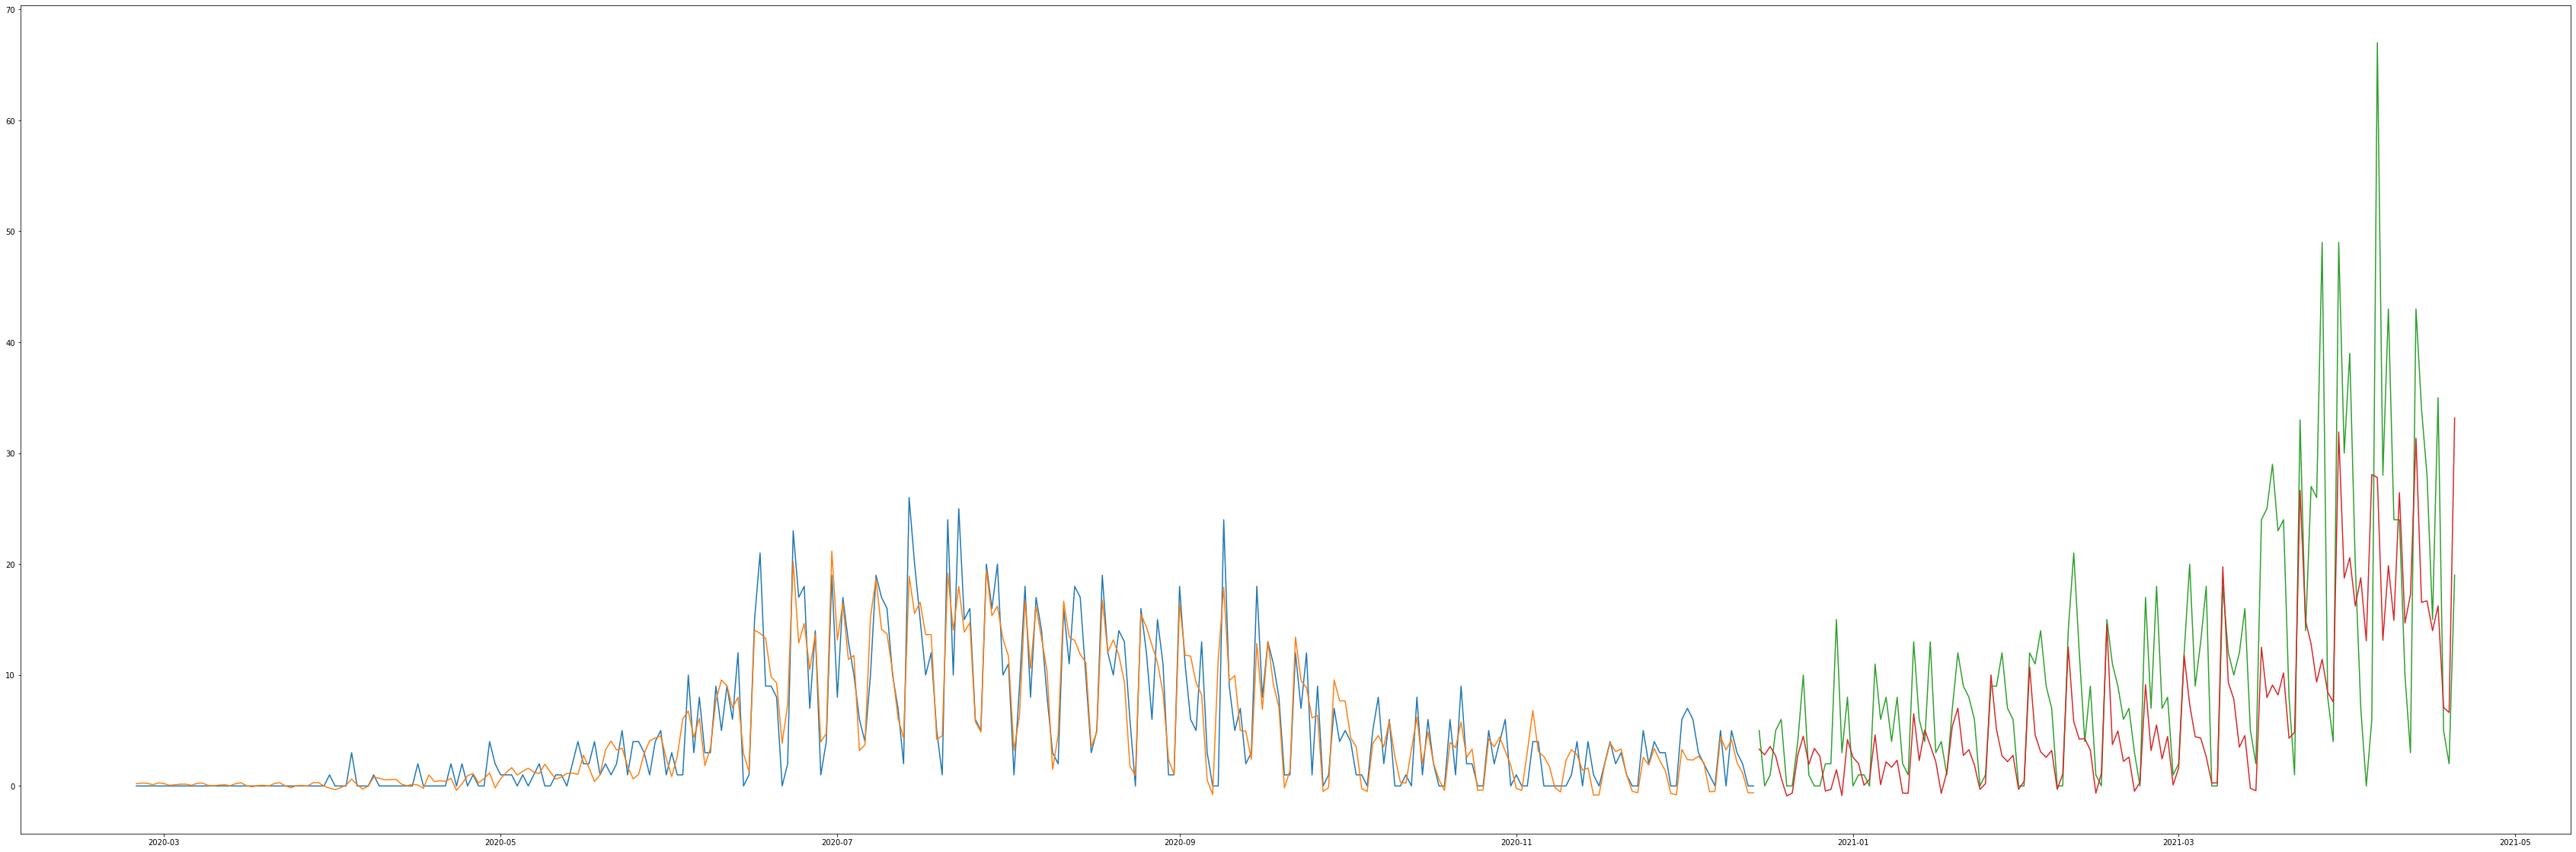

In [ ]:
plt.rcParams["figure.figsize"] = (60,20)
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

87.4220330641253

# Process Data with mobility

In [ ]:
# Read mobility data
mobility_data_2020 = pd.read_csv("data/raw/2020_BR_Region_Mobility_Report.csv")
mobility_data_2021 = pd.read_csv("data/raw/2021_BR_Region_Mobility_Report.csv")
mobility_data = pd.concat([mobility_data_2020, mobility_data_2021])

# Filter for São Paulo state
mobility_sao_paulo_data = mobility_data.loc[mobility_data['sub_region_1'] == 'State of São Paulo']
mobility_sao_paulo_data = mobility_sao_paulo_data.dropna(subset=['sub_region_2'])

# Read data from ibge to convert city name to ibge code (faster and light)
ibge_code_data = pd.read_csv('data/raw/RELATORIO_DTB_BRASIL_MUNICIPIO.csv', engine='python', sep=',')

# Filter for São Paulo state for optimization and remove the need to compare city and state
ibge_code_sao_paulo_data = ibge_code_data.loc[ibge_code_data['Nome_UF'] == 'São Paulo']

# Merge mobility data and ibge data
mobility_sao_paulo_ibge_data = pd.merge(left=mobility_sao_paulo_data, right=ibge_code_sao_paulo_data, how='inner', left_on='sub_region_2', right_on='Nome_Município')

# Read covid-19 data from São Paulo state
covid_sao_paulo_data = pd.read_csv('data/raw/20210420_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

# Set date to datetime
mobility_sao_paulo_ibge_data['date'] = mobility_sao_paulo_ibge_data.loc[:,'date'].astype('datetime64[ns]')
covid_sao_paulo_data['datahora'] = pd.to_datetime(covid_sao_paulo_data.loc[:, 'datahora'], format="%d/%m/%Y")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
mobility_sao_paulo_ibge_data

country_region_code  ... Nome_Município
0                       BR  ...     Adamantina
1                       BR  ...     Adamantina
2                       BR  ...     Adamantina
3                       BR  ...     Adamantina
4                       BR  ...     Adamantina
...                    ...  ...            ...
153870                  BR  ...    Votuporanga
153871                  BR  ...    Votuporanga
153872                  BR  ...    Votuporanga
153873                  BR  ...    Votuporanga
153874                  BR  ...    Votuporanga

[153875 rows x 24 columns]

In [ ]:
booleans = mobility_sao_paulo_ibge_data['Código Município Completo'] == 3509502
filter_campinas = pd.Series(booleans)
mobility_campinas = mobility_sao_paulo_ibge_data[filter_campinas]
mobility_campinas.head(10)

country_region_code  ... Nome_Município
25877                  BR  ...       Campinas
25878                  BR  ...       Campinas
25879                  BR  ...       Campinas
25880                  BR  ...       Campinas
25881                  BR  ...       Campinas
25882                  BR  ...       Campinas
25883                  BR  ...       Campinas
25884                  BR  ...       Campinas
25885                  BR  ...       Campinas
25886                  BR  ...       Campinas

[10 rows x 24 columns]

In [ ]:
campinas_isolamento_lagged

obitos_novos  date_1  date_2  ...  week_cos  year_sin  year_cos
datahora                                  ...                              
2020-02-25             0     NaN     NaN  ... -0.222521  0.809912  0.586551
2020-02-26             0     0.0     NaN  ...  0.623490  0.819882  0.572532
2020-02-27             0     0.0     0.0  ...  1.000000  0.829610  0.558344
2020-02-28             0     0.0     0.0  ...  0.623490  0.839091  0.543991
2020-02-29             0     0.0     0.0  ... -0.222521  0.848325  0.529476
...                  ...     ...     ...  ...       ...       ...       ...
2021-06-15            20     0.0     2.0  ... -0.222521  0.288111 -0.957597
2021-06-16            18    20.0     0.0  ...  0.623490  0.271596 -0.962411
2021-06-17            22    18.0    20.0  ...  1.000000  0.255000 -0.966941
2021-06-18            17    22.0    18.0  ...  0.623490  0.238329 -0.971184
2021-06-19            27    17.0    22.0  ... -0.222521  0.221588 -0.975140

[481 rows x 11 columns]

In [ ]:
# Get columns that will be used to merge and the mobility to retail data
mobility = mobility_campinas[['date', 'retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline', 'transit_stations_percent_change_from_baseline', 'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline']]
mobility_indexed = mobility.set_index(['date'])

# Merge covid-19 data and retail data using shifting to compare with previous dates
covid_mobility_data = pd.merge(campinas_isolamento_lagged, mobility_indexed, how='inner', left_index=True, right_index=True)
covid_mobility_data = covid_mobility_data.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_0'})
covid_mobility_data = covid_mobility_data.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_0'})
covid_mobility_data = covid_mobility_data.rename(columns={'parks_percent_change_from_baseline': 'parks_0'})
covid_mobility_data = covid_mobility_data.rename(columns={'transit_stations_percent_change_from_baseline': 'transit_0'})
covid_mobility_data = covid_mobility_data.rename(columns={'workplaces_percent_change_from_baseline': 'workplace_0'})
covid_mobility_data = covid_mobility_data.rename(columns={'residential_percent_change_from_baseline': 'residential_0'})
for i in range(1,30):
  mobility_shifted = mobility_indexed.shift(i)
  mobility_shifted = mobility_shifted.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_' + str(i)})
  mobility_shifted = mobility_shifted.rename(columns={'grocery_and_pharmacy_percent_change_from_baseline': 'grocery_' + str(i)})
  mobility_shifted = mobility_shifted.rename(columns={'parks_percent_change_from_baseline': 'parks_' + str(i)})
  mobility_shifted = mobility_shifted.rename(columns={'transit_stations_percent_change_from_baseline': 'transit_' + str(i)})
  mobility_shifted = mobility_shifted.rename(columns={'workplaces_percent_change_from_baseline': 'workplace_' + str(i)})
  mobility_shifted = mobility_shifted.rename(columns={'residential_percent_change_from_baseline': 'residential_' + str(i)})
  covid_mobility_data = pd.merge(covid_mobility_data, mobility_shifted, how='inner', left_index=True, right_index=True)

In [ ]:
covid_mobility_data = covid_mobility_data.fillna(0)
obitos = covid_mobility_data.pop('obitos_novos')
covid_mobility_data

date_1  date_2  date_3  ...  transit_29  workplace_29  residential_29
2020-02-25     0.0     0.0     0.0  ...         0.0           0.0             0.0
2020-02-26     0.0     0.0     0.0  ...         0.0           0.0             0.0
2020-02-27     0.0     0.0     0.0  ...         0.0           0.0             0.0
2020-02-28     0.0     0.0     0.0  ...         0.0           0.0             0.0
2020-02-29     0.0     0.0     0.0  ...         0.0           0.0             0.0
...            ...     ...     ...  ...         ...           ...             ...
2021-04-24    17.0     9.0    27.0  ...       -38.0         -24.0            18.0
2021-04-25    23.0    17.0     9.0  ...       -41.0         -15.0            15.0
2021-04-26     0.0    23.0    17.0  ...       -42.0          -9.0            13.0
2021-04-27     7.0     0.0    23.0  ...       -42.0         -25.0            17.0
2021-04-28    37.0     7.0     0.0  ...       -39.0         -27.0            17.0

[429 rows x 190 columns]

In [ ]:
obitos

2020-02-25     0
2020-02-26     0
2020-02-27     0
2020-02-28     0
2020-02-29     0
              ..
2021-04-24    23
2021-04-25     0
2021-04-26     7
2021-04-27    37
2021-04-28    22
Name: obitos_novos, Length: 429, dtype: int64

## SVR

In [ ]:
case_train = covid_mobility_data[:294]
label_train = obitos[:294]

case_test = covid_mobility_data[294:]
label_test = obitos[294:]

In [ ]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
clf = make_pipeline(StandardScaler(),
                    svm.SVR(max_iter=1000, kernel='sigmoid'))
clf.fit(case_train[31:], label_train[31:])

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=1000,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
r = clf.score(case_test[31:], label_test[31:])
r

-0.07543076820945194

In [ ]:
campinas_train_predict = clf.predict(case_train)
campinas_test_predict = clf.predict(case_test)

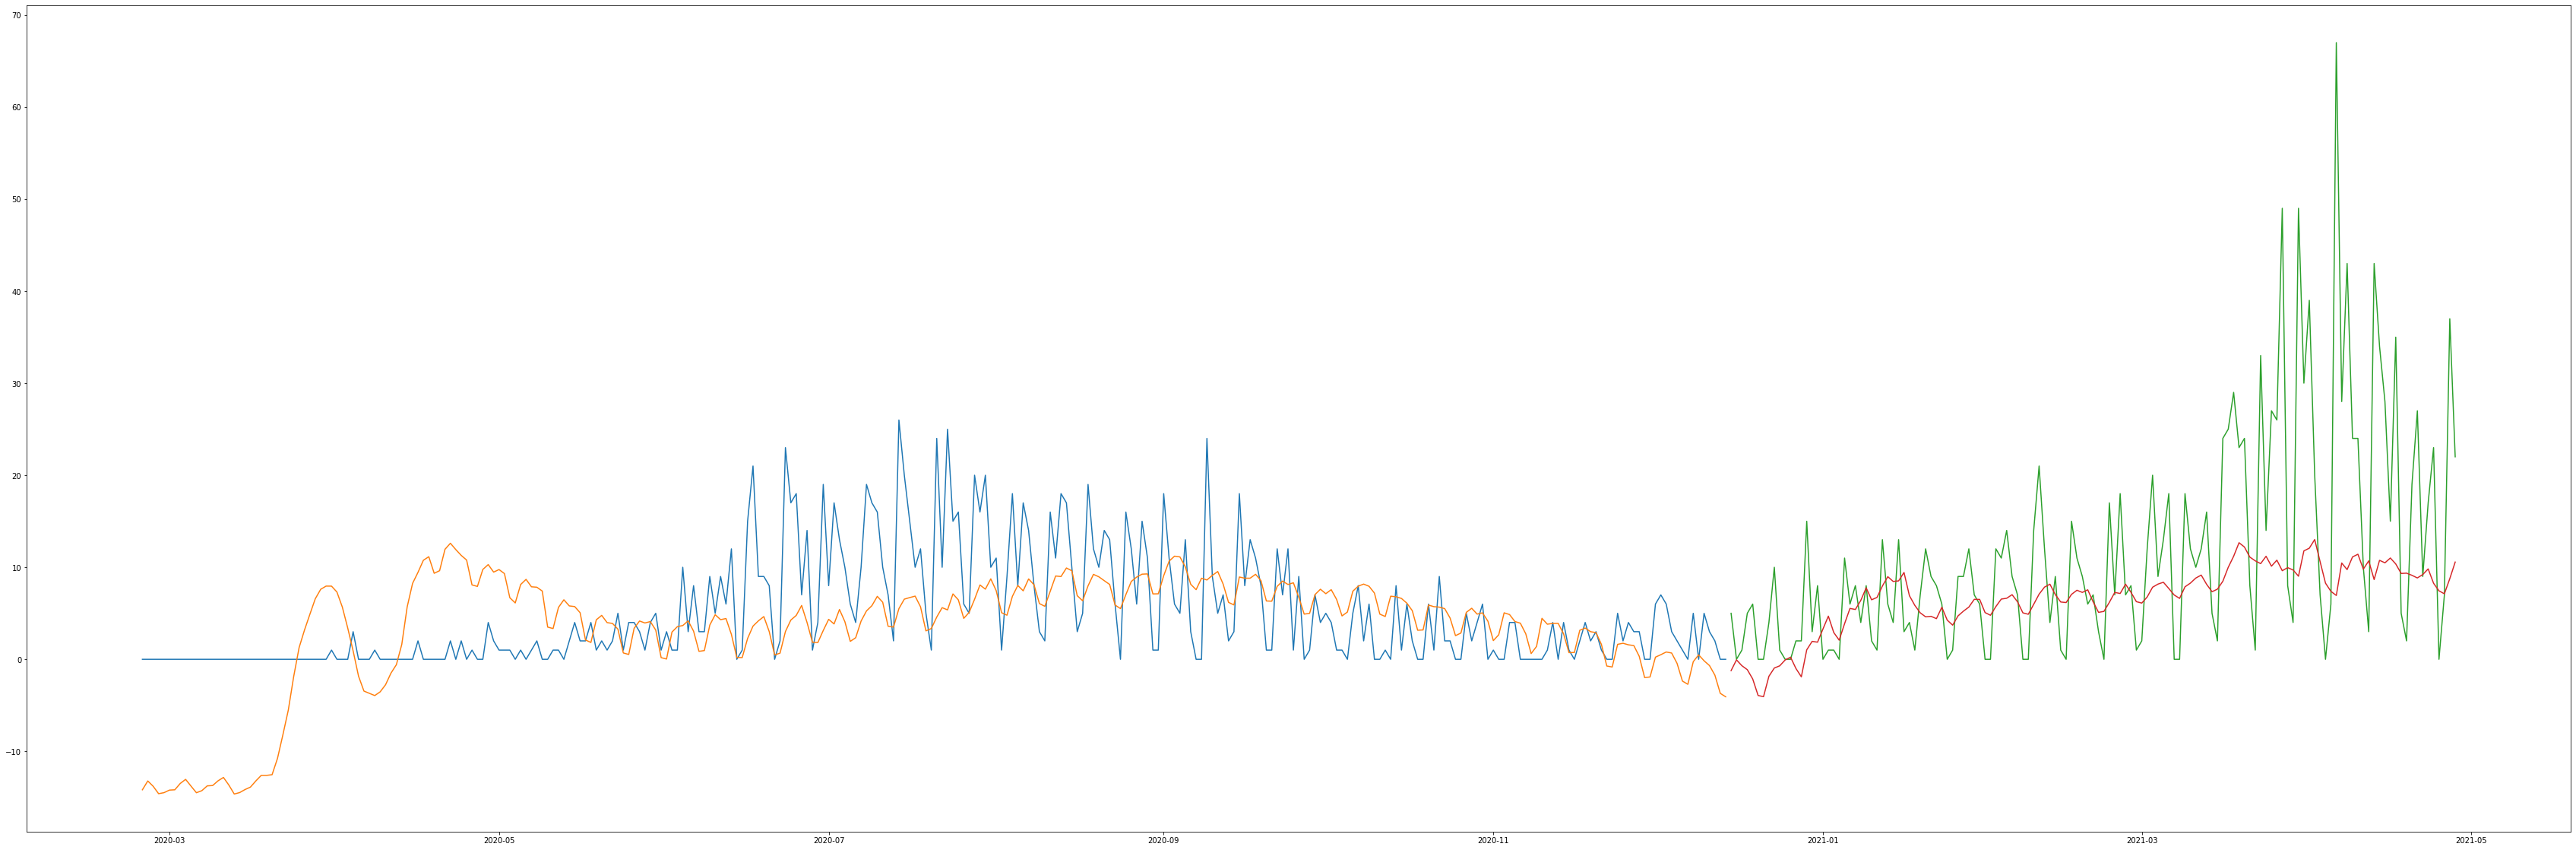

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

140.88668144576027

## SGD

In [ ]:
case_train = covid_mobility_data[:294]
label_train = obitos[:294]

case_test = covid_mobility_data[294:]
label_test = obitos[294:]

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
reg = make_pipeline(StandardScaler(),
                    SGDRegressor(random_state=1, max_iter=100, tol=1e-3, loss='epsilon_insensitive', penalty='l1'))

In [ ]:
reg.fit(case_train[31:], label_train[31:])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='epsilon_insensitive', max_iter=100,
                              n_iter_no_change=5, penalty='l1', power_t=0.25,
                              random_state=1, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test[31:], label_test[31:])
r

0.008035162876937174

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

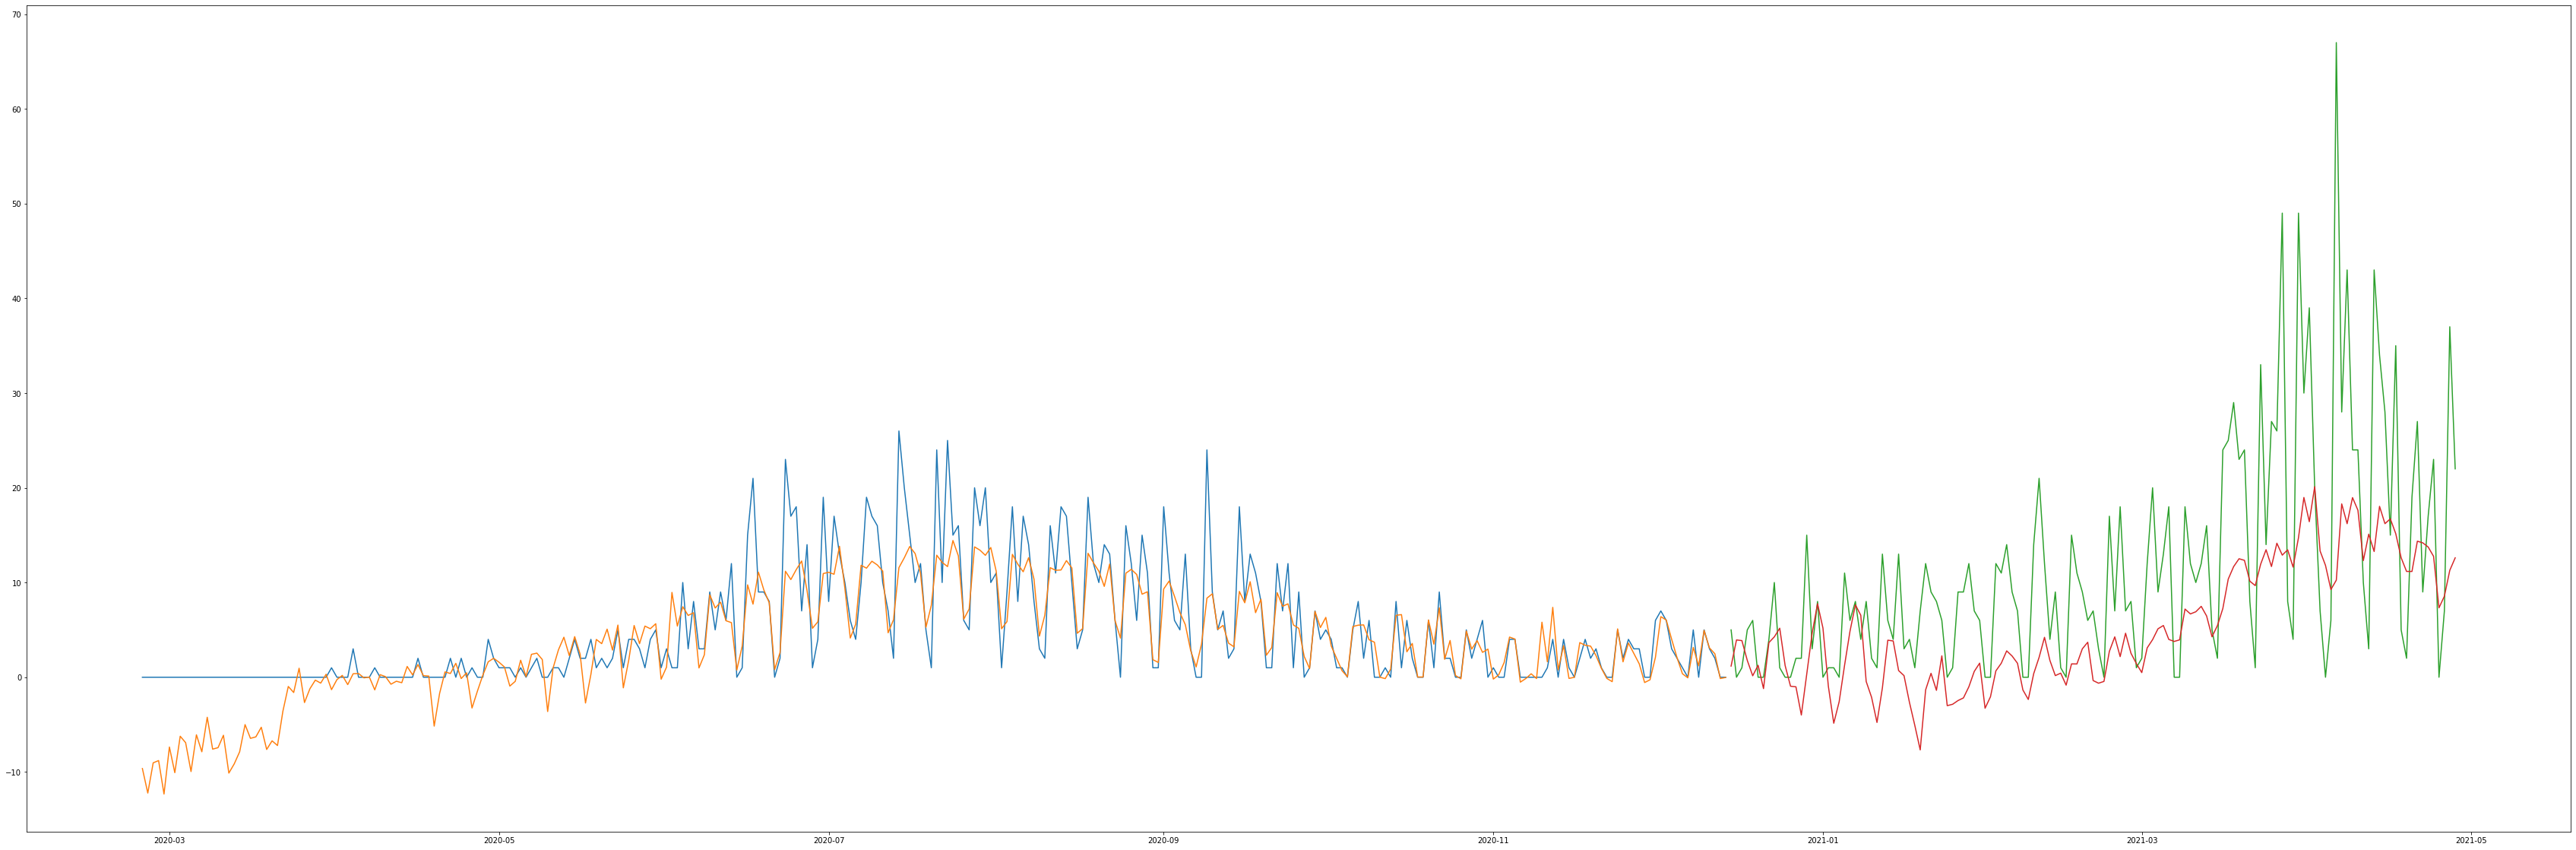

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

131.1993506826045

## Ada boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
case_train = covid_mobility_data[:294]
label_train = obitos[:294]

case_test = covid_mobility_data[294:]
label_test = obitos[294:]

In [ ]:
reg = make_pipeline(StandardScaler(),
                    AdaBoostRegressor(random_state=0, n_estimators=400))
reg.fit(case_train, label_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('adaboostregressor',
                 AdaBoostRegressor(base_estimator=None, learning_rate=1.0,
                                   loss='linear', n_estimators=400,
                                   random_state=0))],
         verbose=False)

In [ ]:
r = reg.score(case_test, label_test)
r

-0.01858798512769244

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

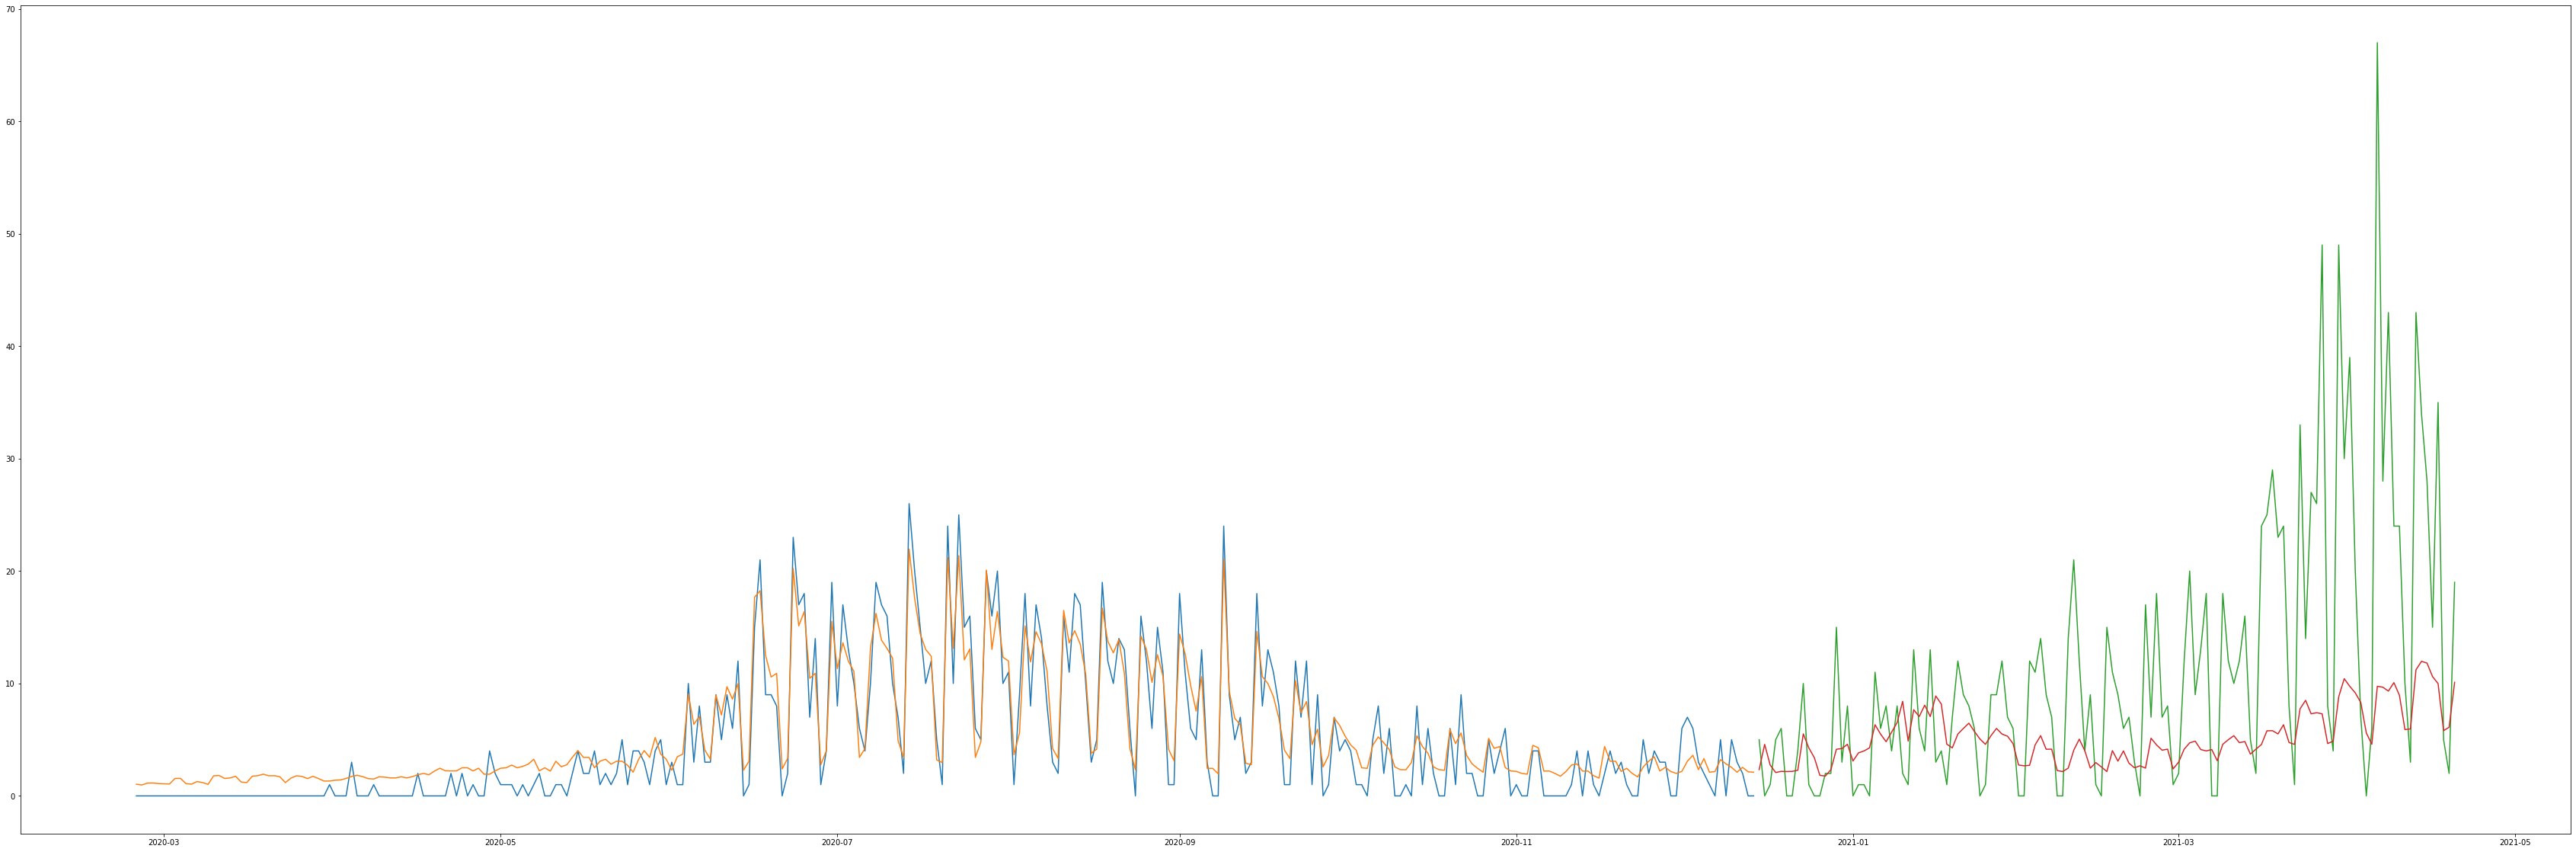

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.show()
plt.rcParams["figure.figsize"] = (60,20)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

149.60627352106772

## NN

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
reg = make_pipeline(StandardScaler(),
                    MLPRegressor(random_state=1, max_iter=500, hidden_layer_sizes=(190,85), solver='sgd', learning_rate='adaptive'))
reg.fit(case_train[31:], label_train[31:])

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlpregressor',
                 MLPRegressor(activation='relu', alpha=0.0001,
                              batch_size='auto', beta_1=0.9, beta_2=0.999,
                              early_stopping=False, epsilon=1e-08,
                              hidden_layer_sizes=(190, 85),
                              learning_rate='adaptive',
                              learning_rate_init=0.001, max_fun=15000,
                              max_iter=500, momentum=0.9, n_iter_no_change=10,
                              nesterovs_momentum=True, power_t=0.5,
                              random_state=1, shuffle=True, solver='sgd',
                              tol=0.0001, validation_fraction=0.1,
                              verbose=False, warm_start=False))],
         verbose=False)

In [ ]:
r = reg.score(case_test[31:], label_test[31:])
r

0.06008822739812525

In [ ]:
campinas_train_predict = reg.predict(case_train)
campinas_test_predict = reg.predict(case_test)

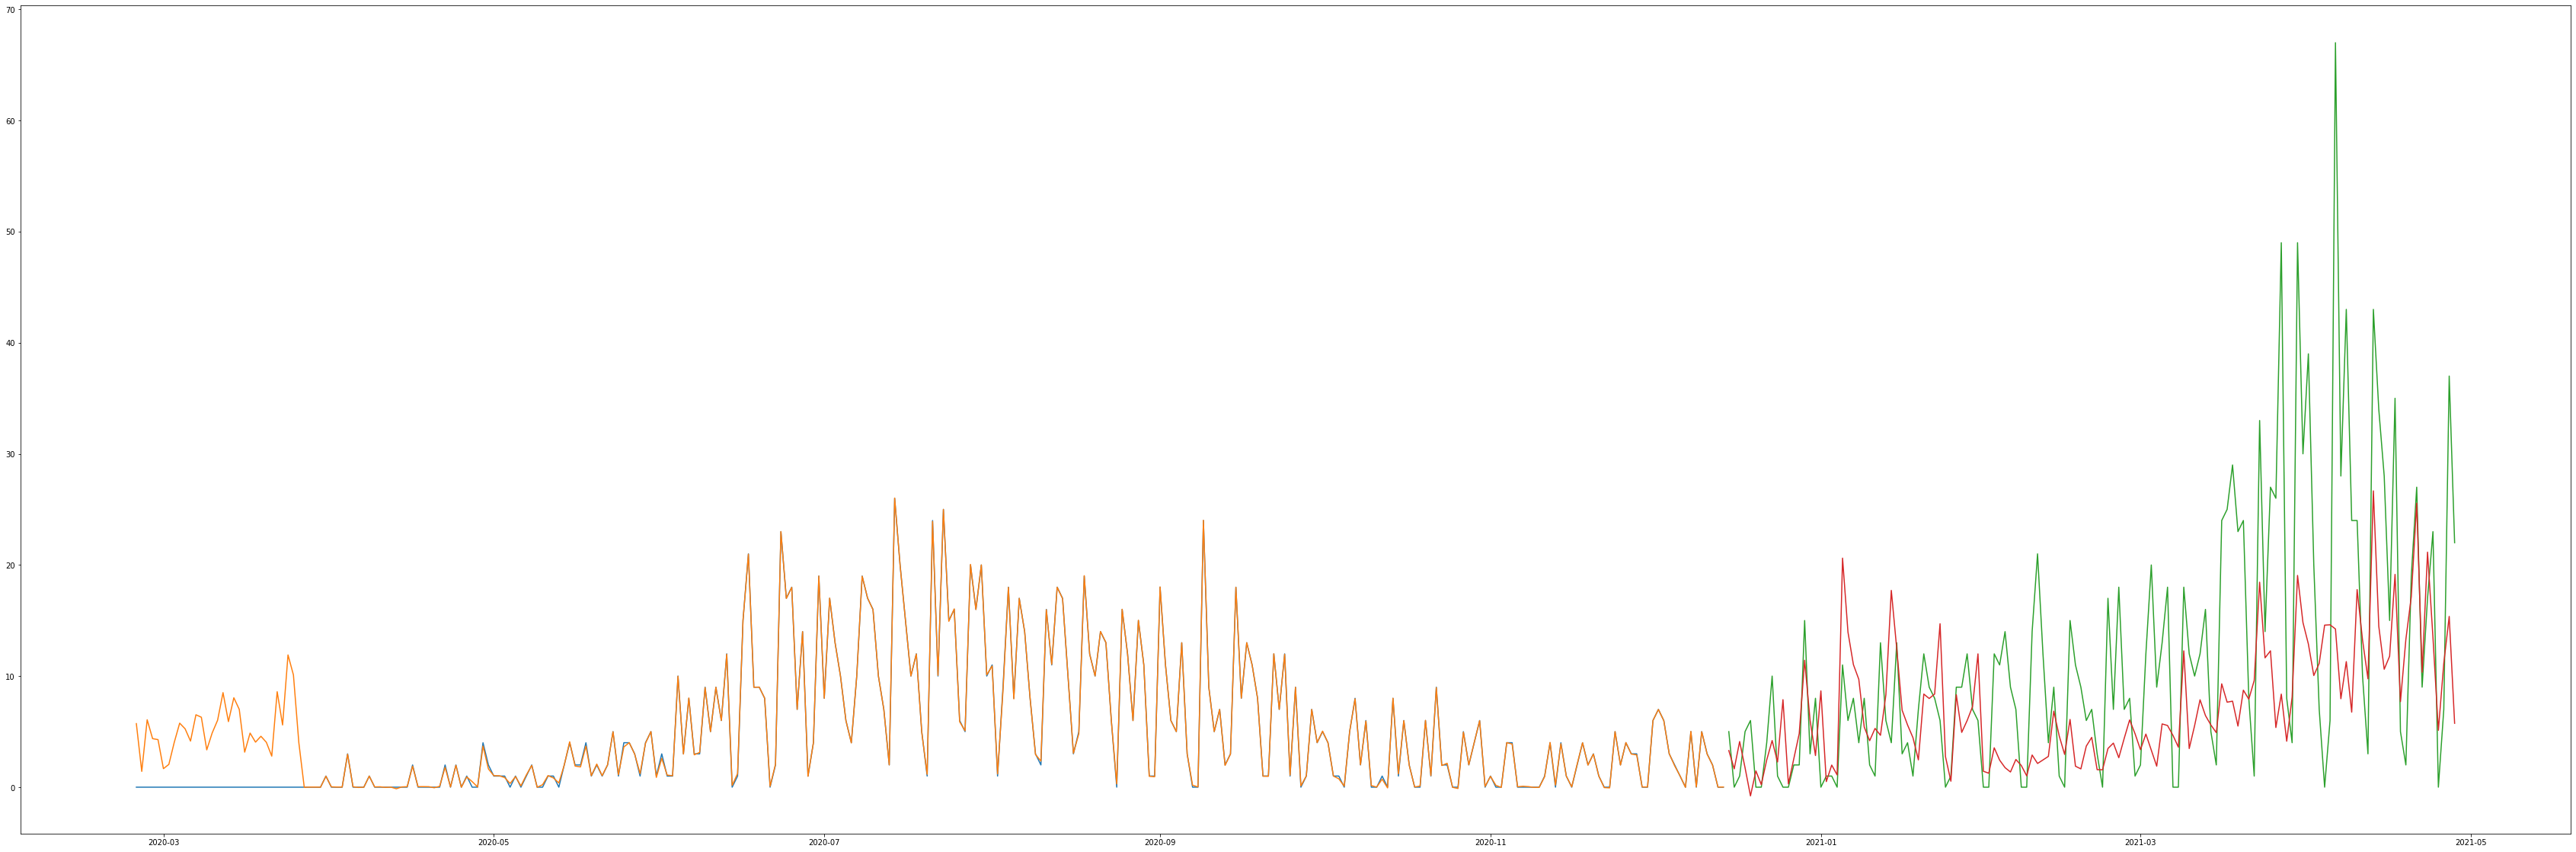

In [ ]:
plt.plot(case_train.index, label_train, label="real")
plt.plot(case_train.index, campinas_train_predict, label="Predicted")
plt.plot(case_test.index, label_test, label="real test")
plt.plot(case_test.index, campinas_test_predict, label="Predicted test")
plt.rcParams["figure.figsize"] = (60,20)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(label_test, campinas_test_predict)
mse

123.89849038845321

# Validate

Para o conjunto de validação utilizamos o melhor modelo obtido que foi o de rede neural utilizando apenas os dados dos 6 últimos dias de óbitos novos e os dados de seno e coseno para a semana e o ano.

In [ ]:
isolamento_sao_paulo_data_valid = pd.read_csv('data/raw/20210619_dados_covid_municipios_sp_utf_8.csv', engine='python', sep=';')

In [ ]:
isolamento_sao_paulo_data_valid

ï»¿nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0               Adamantina      3500105   25  ...   -21,682  -51,0737              9
1                   Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2                   AguaÃ­      3500303   25  ...  -22,0572  -46,9735              9
3          Ãguas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4       Ãguas de LindÃ³ia      3500501   25  ...  -22,4733  -46,6314              9
...                    ...          ...  ...  ...       ...       ...            ...
310721            Ignorado      9999999   15  ...         0         0             24
310722            Ignorado      9999999   16  ...         0         0             24
310723            Ignorado      9999999   17  ...         0         0             24
310724            Ignorado      9999999   18  ...         0         0             24
310725            Ignorado      9999999   19  ...         0         0             24

[310726 rows x 26 columns]

In [ ]:
booleans = isolamento_sao_paulo_data_valid['codigo_ibge'] == 3509502
filter_campinas = pd.Series(booleans)
campinas_isolamento = isolamento_sao_paulo_data_valid[filter_campinas]
campinas_isolamento.head(10)

ï»¿nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
108       Campinas      3509502   25  ...  -22,9053  -47,0659              9
753       Campinas      3509502   26  ...  -22,9053  -47,0659              9
1398      Campinas      3509502   27  ...  -22,9053  -47,0659              9
2043      Campinas      3509502   28  ...  -22,9053  -47,0659              9
2688      Campinas      3509502   29  ...  -22,9053  -47,0659              9
3333      Campinas      3509502    1  ...  -22,9053  -47,0659             10
3978      Campinas      3509502    2  ...  -22,9053  -47,0659             10
4623      Campinas      3509502    3  ...  -22,9053  -47,0659             10
5268      Campinas      3509502    4  ...  -22,9053  -47,0659             10
5913      Campinas      3509502    5  ...  -22,9053  -47,0659             10

[10 rows x 26 columns]

In [ ]:
cols_time_series = ['datahora', 'obitos_novos']
campinas_isolamento_obito = campinas_isolamento[cols_time_series]

campinas_isolamento_obito['datahora'] = pd.to_datetime(campinas_isolamento_obito.loc[:, 'datahora'], format="%d/%m/%Y")
campinas_isolamento_obito['datahora'] = campinas_isolamento_obito.loc[:,'datahora'].astype('datetime64[ns]')
campinas_isolamento_obito = campinas_isolamento_obito.set_index("datahora")
campinas_isolamento_obito = campinas_isolamento_obito.sort_index().asfreq(freq='D', method='pad')
campinas_isolamento_obito.index

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


DatetimeIndex(['2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28',
               '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03',
               '2020-03-04', '2020-03-05',
               ...
               '2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13',
               '2021-06-14', '2021-06-15', '2021-06-16', '2021-06-17',
               '2021-06-18', '2021-06-19'],
              dtype='datetime64[ns]', name='datahora', length=481, freq='D')

In [ ]:
campinas_isolamento_lagged = campinas_isolamento_obito[:]
for i in range(1,7):
  campinas_obito_lagged = campinas_isolamento_obito.shift(i);
  campinas_obito_lagged = campinas_obito_lagged.rename(columns={'obitos_novos': 'date_' + str(i)})
  campinas_isolamento_lagged = pd.merge(campinas_isolamento_lagged, campinas_obito_lagged, how='inner', left_on=['datahora'], right_on=['datahora'])

In [ ]:
day = 24 * 60 * 60
week = 7 * day
year = 365.2425 * day
timestamp = campinas_isolamento_lagged.index.map(pd.Timestamp.timestamp)
campinas_isolamento_lagged['week_sin'] = np.sin(timestamp * (2 * np.pi / week))
campinas_isolamento_lagged['week_cos'] = np.cos(timestamp * (2 * np.pi / week))
campinas_isolamento_lagged['year_sin'] = np.sin(timestamp * (2 * np.pi / year))
campinas_isolamento_lagged['year_cos'] = np.cos(timestamp * (2 * np.pi / year))

In [ ]:
campinas_isolamento_lagged[50:].head(10)

obitos_novos  date_1  date_2  ...  week_cos  year_sin  year_cos
datahora                                  ...                              
2020-04-15             0     0.0     0.0  ...  0.623490  0.972898 -0.231233
2020-04-16             2     0.0     0.0  ...  1.000000  0.968777 -0.247935
2020-04-17             0     2.0     0.0  ...  0.623490  0.964368 -0.264563
2020-04-18             0     0.0     2.0  ... -0.222521  0.959675 -0.281113
2020-04-19             0     0.0     0.0  ... -0.900969  0.954697 -0.297579
2020-04-20             0     0.0     0.0  ... -0.900969  0.949437 -0.313958
2020-04-21             0     0.0     0.0  ... -0.222521  0.943896 -0.330244
2020-04-22             2     0.0     0.0  ...  0.623490  0.938075 -0.346432
2020-04-23             0     2.0     0.0  ...  1.000000  0.931977 -0.362517
2020-04-24             2     0.0     2.0  ...  0.623490  0.925603 -0.378495

[10 rows x 11 columns]

In [ ]:
val_lagged = campinas_isolamento_lagged.loc[campinas_isolamento_lagged.index > '2021-04-21 00:00:00']

In [ ]:
obitos = val_lagged.pop('obitos_novos')

In [ ]:
val_lagged.head(5)

date_1  date_2  date_3  ...  week_cos  year_sin  year_cos
datahora                            ...                              
2021-04-22    27.0    19.0     2.0  ...  1.000000  0.939512 -0.342515
2021-04-23     9.0    27.0    19.0  ...  0.623490  0.933481 -0.358626
2021-04-24    17.0     9.0    27.0  ... -0.222521  0.927174 -0.374631
2021-04-25    23.0    17.0     9.0  ... -0.900969  0.920593 -0.390524
2021-04-26     0.0    23.0    17.0  ... -0.900969  0.913739 -0.406302

[5 rows x 10 columns]

In [ ]:
obitos.head(5)

datahora
2021-04-22     9
2021-04-23    17
2021-04-24    23
2021-04-25     0
2021-04-26     7
Name: obitos_novos, dtype: int64

In [ ]:
campinas_val_predict = reg.predict(val_lagged)

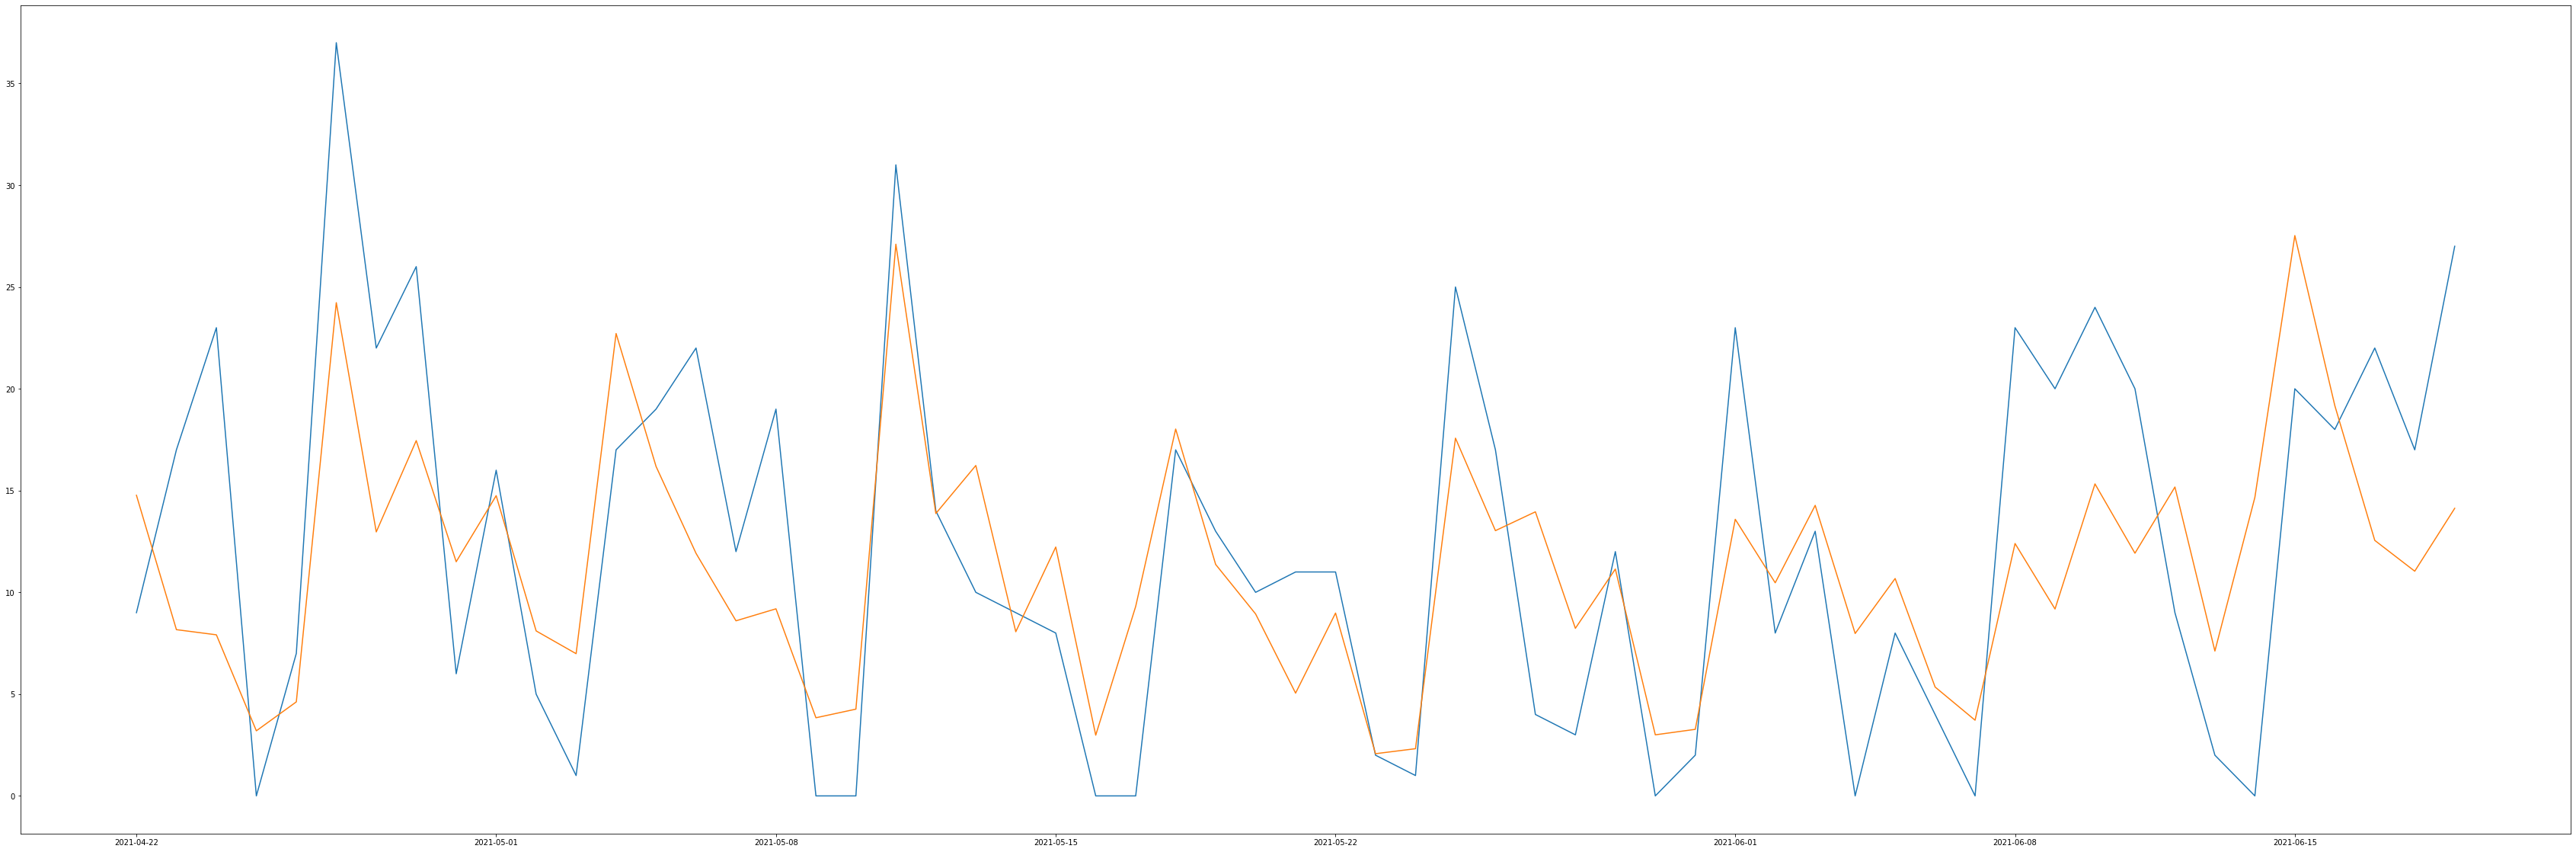

In [ ]:
plt.plot(val_lagged.index, obitos, label="Real")
plt.plot(val_lagged.index, campinas_val_predict, label="Predicted Val")
plt.show()

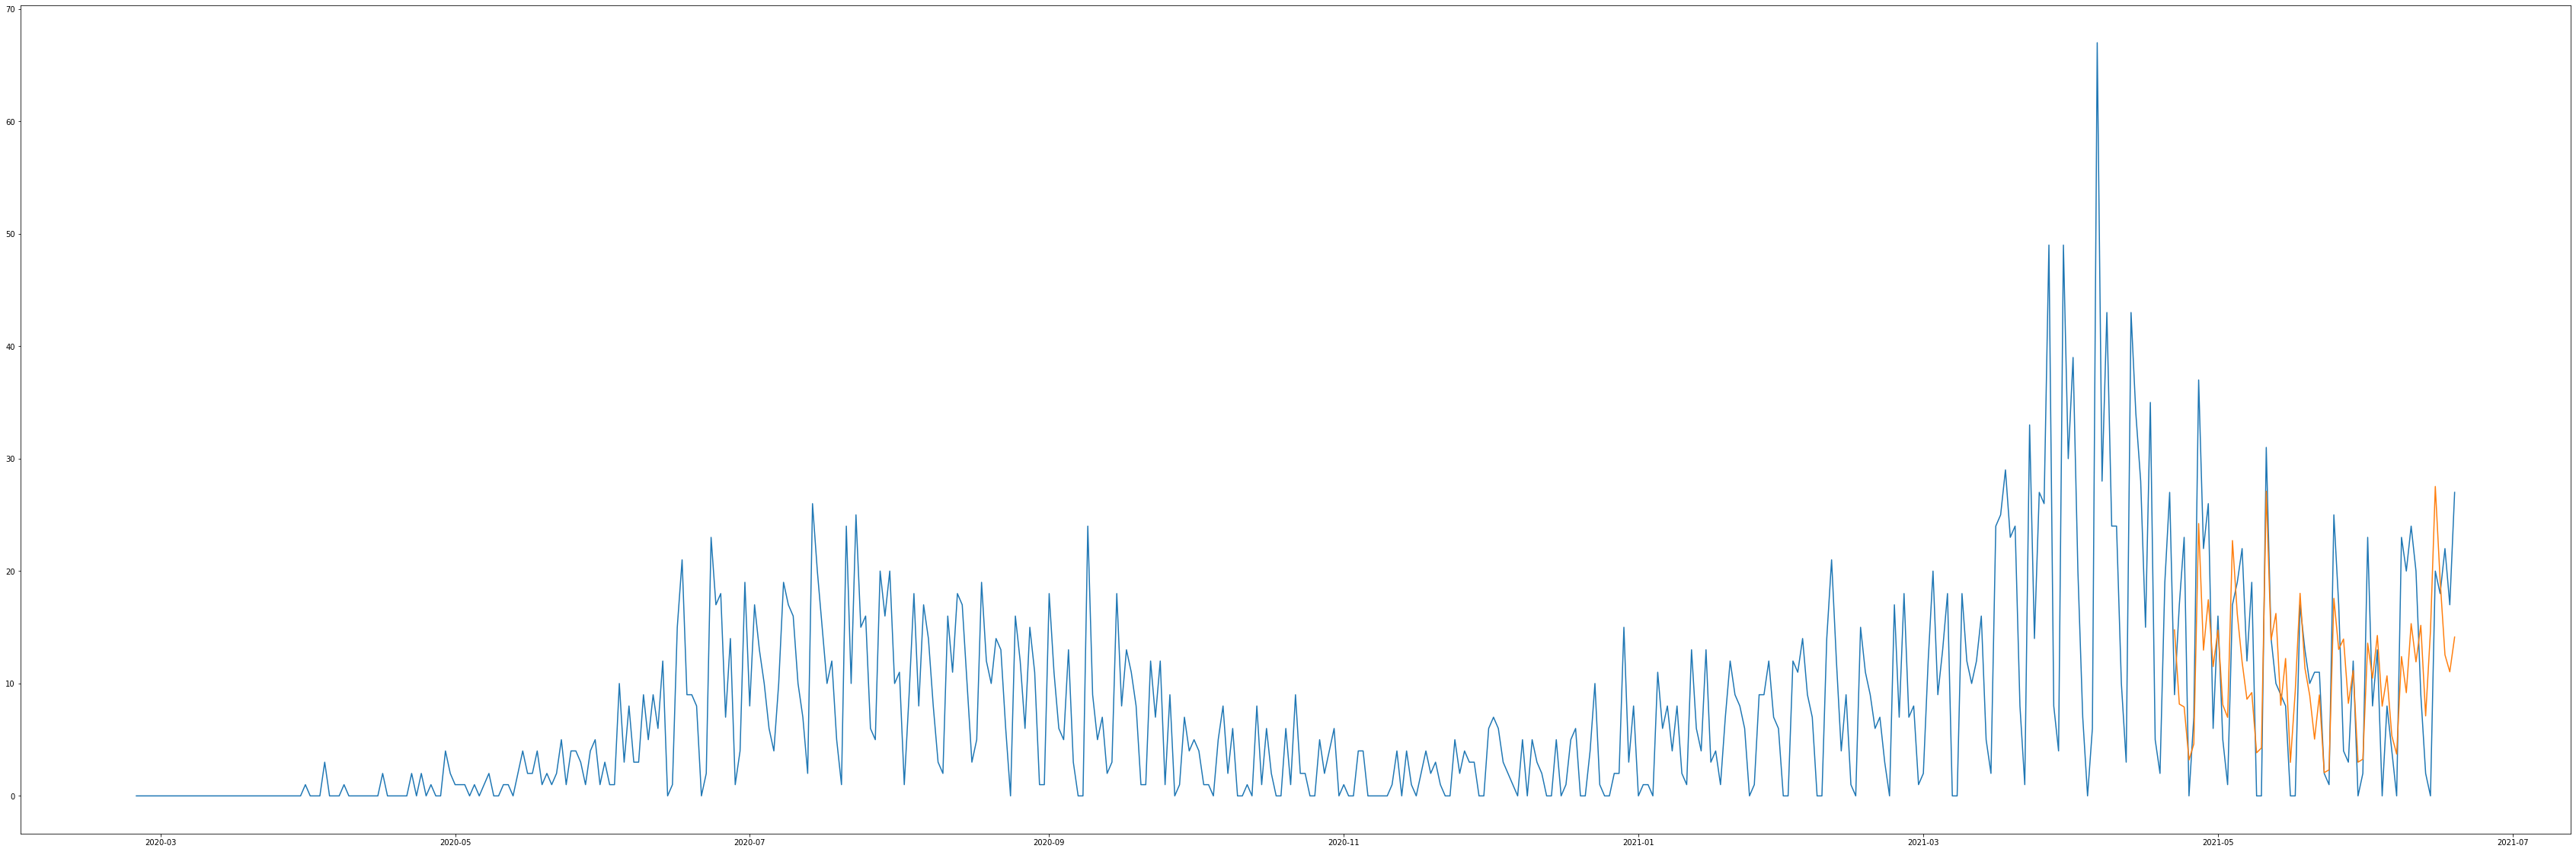

In [ ]:
plt.rcParams["figure.figsize"] = (60,20)
plt.plot(campinas_isolamento_lagged.index, campinas_isolamento_lagged['obitos_novos'], label="Real")
plt.plot(val_lagged.index, campinas_val_predict, label="Predicted Val")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(obitos, campinas_val_predict)
mse

44.6856642066876